# Scenario 1: Flipping Two-Sided Coins

1. Create one fair coin with faces H and T and one unfair coin with weight 5 for face H and weight 1 for face T.

In [1]:
from montecarlosimulator.Die import *
array_of_faces = np.array(['H', 'T'], dtype = str)
fair_coin = Die(array_of_faces)
fair_coin.show()

,face,weight
0,H,1.0
1,T,1.0


In [2]:
array_of_faces = np.array(['H', 'T'], dtype = str)
unfair_coin = Die(array_of_faces)
unfair_coin.change_weight('H', 5)
unfair_coin.show()

,face,weight
0,H,5.0
1,T,1.0


2. Play a game of 1,000 flips of three fair coins.

In [3]:
from montecarlosimulator.Game import *
list_of_fair_coins = []
array_of_faces = np.array(['H', 'T'], dtype = str)
for i in range(0, 3):
    fair_coin = Die(array_of_faces)
    list_of_fair_coins.append(fair_coin)
game_with_three_fair_coins = Game(list_of_fair_coins)
game_with_three_fair_coins.play(1000)
game_with_three_fair_coins.show('wide')

,0,1,2
roll_index,,,
0,H,T,T
1,H,T,H
2,H,T,T
3,H,H,H
4,H,H,T
...,...,...,...
995,T,H,T
996,H,H,T
997,T,T,T


3. Play a game 1,000 flips with two unfair coins and one fair coin.

In [4]:
array_of_faces = np.array(['H', 'T'], dtype = str)
unfair_coin_1 = Die(array_of_faces)
unfair_coin_1.change_weight('H', 5)
unfair_coin_2 = Die(array_of_faces)
unfair_coin_2.change_weight('H', 5)
fair_coin = Die(array_of_faces)
list_of_unfair_and_fair_coins = [unfair_coin_1, unfair_coin_2, fair_coin]
game_with_two_unfair_coins_and_one_fair_coin = Game(list_of_unfair_and_fair_coins)
game_with_two_unfair_coins_and_one_fair_coin.play(1000)
game_with_two_unfair_coins_and_one_fair_coin.show('wide')

,0,1,2
roll_index,,,
0,H,H,H
1,H,H,H
2,H,H,T
3,H,H,H
4,H,H,H
...,...,...,...
995,H,H,T
996,H,H,H
997,H,H,T


4.  For each game, use an `Analyzer` object to determine the relative frequency of jackpots. A jackpot is a roll with all heads or all tails. Relative frequency is the ratio of the number of jackpots to the number of rolls.

    The probability for one flip of one fair coin of flipping one head
    $$p = \frac{number \ of \ favorable \ outcomes}{number \ of \ outcomes} = \frac{n_{H}}{n_{H, T}} = \frac{1}{2} = 0.5$$
    The binomial probability for one flip of $n$ fair coins of flipping $r$ heads
    $$B(n, r, p) = C(n, r) \ p^r \ (q = 1 - p)^{n - r}$$
    The binomial probability for one flip of $3$ fair coins of flipping $3$ heads
    $$B(3, 3, 0.5) = C(3, 3) \ 0.5^3 \ (1 - 0.5)^{3 - 3} = 0.125$$
    The binomial probability for one flip of $3$ fair coins of flipping $3$ tails
    $$B(3, 3, 0.5) = 0.125$$
    For events $A$ and $B$, the probability of $A$ or $B$ occurring
    $$P(A \ or \ B) = P(A) + P(B) - P(A \ and \ B)$$
    For mutually exclusive events $A$ and $B$, the probability of $A$ and $B$ occurring
    $$P(A \ and \ B) = 0$$
    Let event $3H$ be flipping $3$ heads for one flip of $3$ fair coins.
    Let event $3T$ be flipping $3$ tails for one flip of $3$ fair coins.
    $3H$ and $3T$ are mutually exclusive.
    $$P(3H \ or \ 3T) = P(3H) + P(3T) - P(3H \ and \ 3T) = 0.125 + 0.125 - 0 = 0.25$$

In [5]:
from montecarlosimulator.Analyzer import *
def calculate_relative_frequency(analyzer, number_of_flips):
    analyzer.play(number_of_flips)
    number_of_jackpots = analyzer.get_number_of_rolls_where_all_dice_have_the_same_face(
        data_frame_of_face_combinations_and_counts_where_combinations_have_all_faces_the_same_should_be_created = False
    )
    relative_frequency = number_of_jackpots / number_of_flips
    return relative_frequency
analyzer = Analyzer(game_with_three_fair_coins)
relative_frequency_for_three_fair_coins = calculate_relative_frequency(analyzer, 1000)
relative_frequency_for_three_fair_coins

0.239

C:\Users\Tom\Documents\montecarlosimulator\montecarlosimulator\Analyzer.py:161: PerformanceWarning: indexing past lexsort depth may impact performance.
  self.data_frame_of_face_combinations_and_counts.at[face_combination, 'count'] = 1
C:\Users\Tom\Documents\montecarlosimulator\montecarlosimulator\Analyzer.py:161: PerformanceWarning: indexing past lexsort depth may impact performance.
  self.data_frame_of_face_combinations_and_counts.at[face_combination, 'count'] = 1
C:\Users\Tom\Documents\montecarlosimulator\montecarlosimulator\Analyzer.py:161: PerformanceWarning: indexing past lexsort depth may impact performance.
  self.data_frame_of_face_combinations_and_counts.at[face_combination, 'count'] = 1
C:\Users\Tom\Documents\montecarlosimulator\montecarlosimulator\Analyzer.py:161: PerformanceWarning: indexing past lexsort depth may impact performance.
  self.data_frame_of_face_combinations_and_counts.at[face_combination, 'count'] = 1
C:\Users\Tom\Documents\montecarlosimulator\montecarlosim

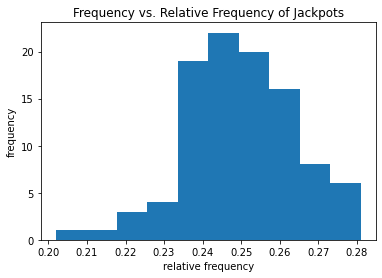

In [6]:
import matplotlib.pyplot as plt
relative_frequencies = []
for i in range(0, 100):
    relative_frequency = calculate_relative_frequency(analyzer, 1000)
    relative_frequencies.append(relative_frequency)
plt.hist(relative_frequencies)
plt.title('Frequency vs. Relative Frequency of Jackpots')
plt.xlabel('relative frequency')
plt.ylabel('frequency')
plt.show()

In [7]:
analyzer = Analyzer(game_with_two_unfair_coins_and_one_fair_coin)
relative_frequency_for_one_fair_coin_and_two_unfair_coins = calculate_relative_frequency(analyzer, 1000)
relative_frequency_for_one_fair_coin_and_two_unfair_coins

0.381

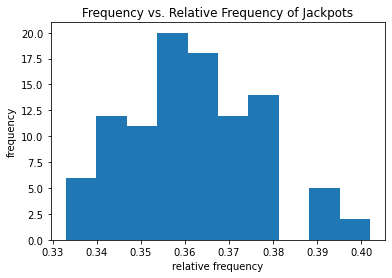

In [8]:
relative_frequencies = []
for i in range(0, 100):
    relative_frequency = calculate_relative_frequency(analyzer, 1000)
    relative_frequencies.append(relative_frequency)
plt.hist(relative_frequencies)
plt.title('Frequency vs. Relative Frequency of Jackpots')
plt.xlabel('relative frequency')
plt.ylabel('frequency')
plt.show()

6.  Compare relative frequency of jackpots for a set of 3 fair coins and a set of 1 fair coin and 2 unfair coins.

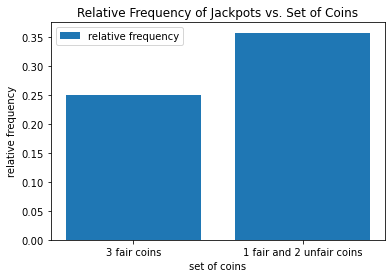

In [9]:
import matplotlib.pyplot as plt
plt.bar(x = ['3 fair coins', '1 fair and 2 unfair coins'], height = [0.249, 0.357], label = 'relative frequency')
plt.title('Relative Frequency of Jackpots vs. Set of Coins')
plt.xlabel('set of coins')
plt.ylabel('relative frequency')
plt.legend()
plt.show()